# Regression

## K-최근접 이웃 회귀

### 생선 데이터 가져오기 

In [2]:
import numpy as np

perch_length = np.array(
    [
        8.4,
        13.7,
        15.0,
        16.2,
        17.4,
        18.0,
        18.7,
        19.0,
        19.6,
        20.0,
        21.0,
        21.0,
        21.0,
        21.3,
        22.0,
        22.0,
        22.0,
        22.0,
        22.0,
        22.5,
        22.5,
        22.7,
        23.0,
        23.5,
        24.0,
        24.0,
        24.6,
        25.0,
        25.6,
        26.5,
        27.3,
        27.5,
        27.5,
        27.5,
        28.0,
        28.7,
        30.0,
        32.8,
        34.5,
        35.0,
        36.5,
        36.0,
        37.0,
        37.0,
        39.0,
        39.0,
        39.0,
        40.0,
        40.0,
        40.0,
        40.0,
        42.0,
        43.0,
        43.0,
        43.5,
        44.0,
    ]
)

perch_weight = np.array(
    [
        5.9,
        32.0,
        40.0,
        51.5,
        70.0,
        100.0,
        78.0,
        80.0,
        85.0,
        85.0,
        110.0,
        115.0,
        125.0,
        130.0,
        120.0,
        120.0,
        130.0,
        135.0,
        110.0,
        130.0,
        150.0,
        145.0,
        150.0,
        170.0,
        225.0,
        145.0,
        188.0,
        180.0,
        197.0,
        218.0,
        300.0,
        260.0,
        265.0,
        250.0,
        250.0,
        300.0,
        320.0,
        514.0,
        556.0,
        840.0,
        685.0,
        700.0,
        700.0,
        690.0,
        900.0,
        650.0,
        820.0,
        850.0,
        900.0,
        1015.0,
        820.0,
        1100.0,
        1000.0,
        1100.0,
        1000.0,
        1000.0,
    ]
)

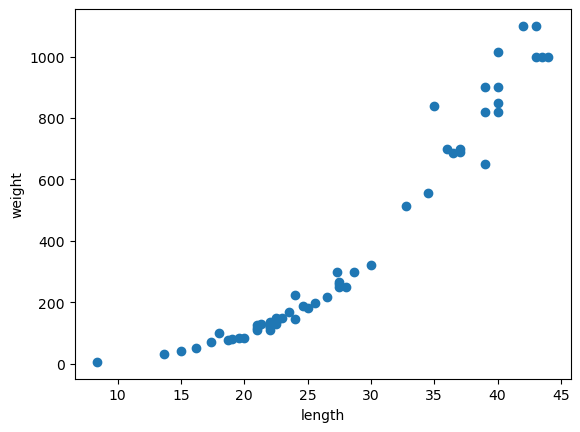

In [3]:
# 산점도 그려서 확인
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 훈련세트와 테스트 세트 준비

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

print(train_input.shape, test_input.shape)

# reshape(-1, 1): -1 -> 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1)  # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1)  # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


### K-최근접 이웃 회귀 알고리즘 정확도 계산 ($R^2$)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(f"knr.score: {knr.score(train_input, train_target)}")
print(f"test.score: {knr.score(test_input, test_target)}")

knr.score: 0.9698823289099254
test.score: 0.992809406101064


### 평균 절대 오차


In [6]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


### 과대적합 vs 과소적합

In [7]:
print(f"knr.score_train: {knr.score(train_input, train_target)}")
print(f"knr.score_test: {knr.score(test_input, test_target)}")

# 이웃의 갯수를 3으로 설정
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)

print(f"knr.score_train_new: {knr.score(train_input, train_target)}")
print(f"knr.score_test_new: {knr.score(test_input, test_target)}")

knr.score_train: 0.9698823289099254
knr.score_test: 0.992809406101064
knr.score_train_new: 0.9804899950518966
knr.score_test_new: 0.9746459963987609


### 이웃의 수에 따른 그래프 비교

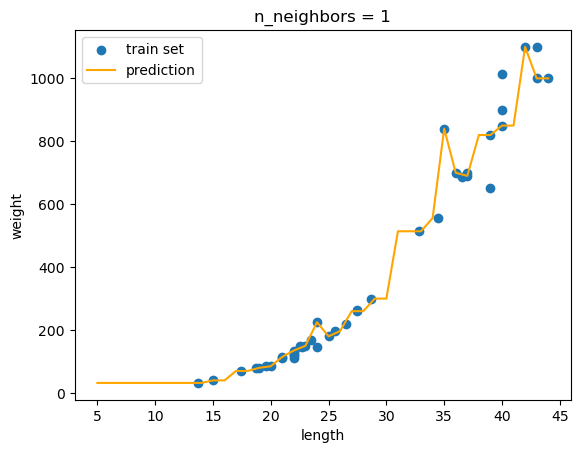

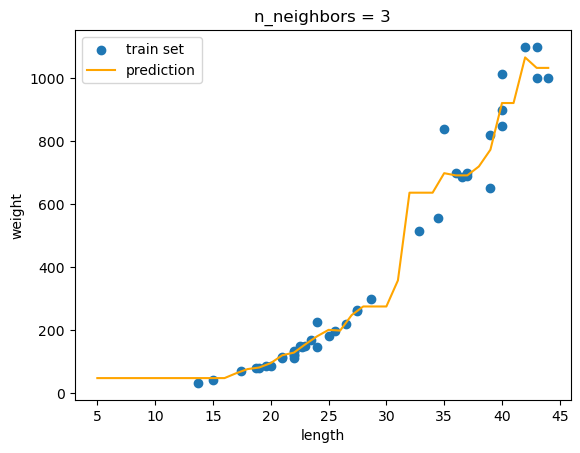

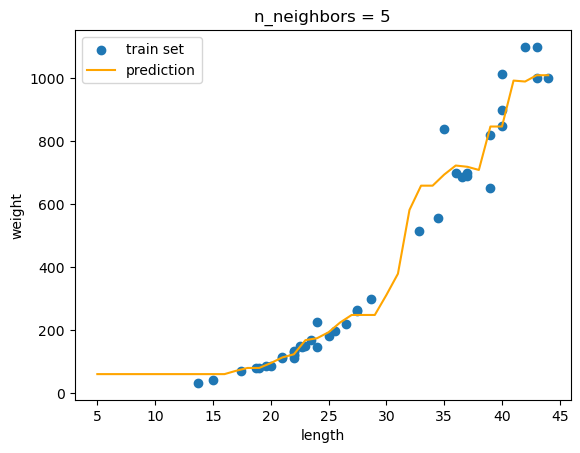

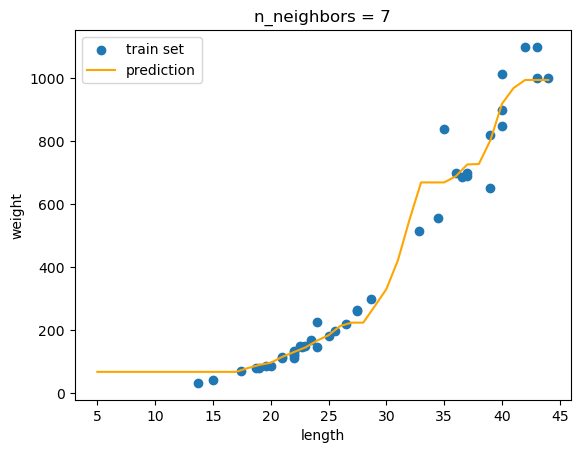

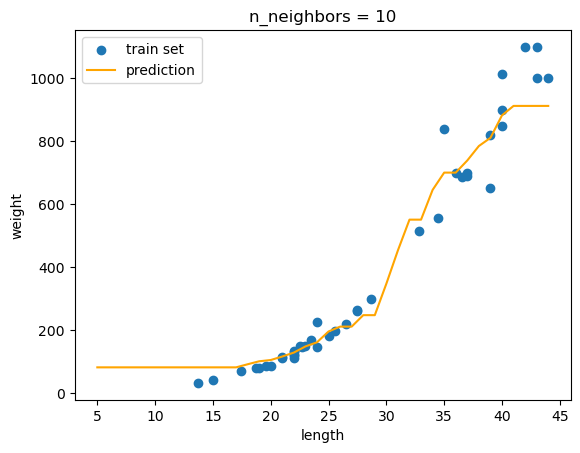

In [8]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()
# x:농어의 길이(5 ~ 45까지 범위 설정)
x = np.arange(5, 45).reshape(-1, 1)

# n=1, 5, 10일때 예측 결과 그래프
for n in [1, 3, 5, 7, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label="train set")
    plt.plot(x, prediction, label="prediction", color="orange")
    plt.title("n_neighbors = {}".format(n))
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.legend()
    plt.show()

### k-최근접 이웃 알고리즘 문제점

In [9]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print("50cm:", knr.predict([[50]]))
print("100cm:", knr.predict([[100]]))

50cm: [1033.33333333]
100cm: [1033.33333333]


### 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교

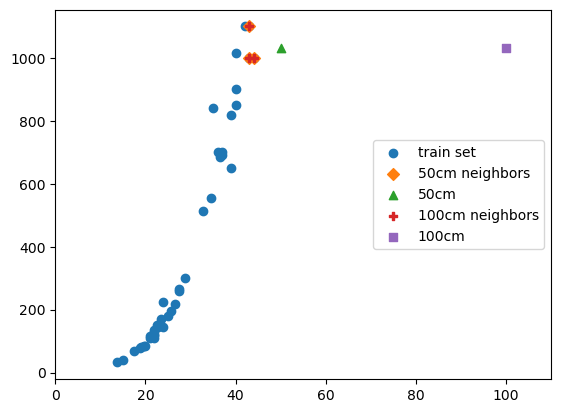

In [10]:
distance_50, indexes_50 = knr.kneighbors([[50]])
distance_100, indexes_100 = knr.kneighbors([[100]])

plt.scatter(train_input, train_target, label="train set")

plt.scatter(
    train_input[indexes_50],
    train_target[indexes_50],
    marker="D",
    label="50cm neighbors",
)
plt.scatter(50, 1033, marker="^", label="50cm")

plt.scatter(
    train_input[indexes_100],
    train_target[indexes_100],
    marker="P",
    label="100cm neighbors",
)
plt.scatter(100, 1033, marker="s", label="100cm")

plt.xlim(0, 110)
plt.legend(loc=5)
plt.show()

## 선형회귀 

### 훈련 데이터를 이용한 직선 방정식 구하기

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print("50cm: ", lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

50cm:  [1241.83860323]
[39.01714496] -709.0186449535477


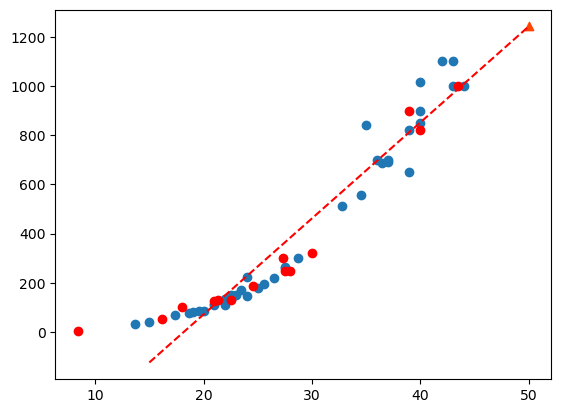

train data score:  0.939846333997604
test data score:  0.8247503123313558


In [12]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target, color="red")

plt.plot(
    [15, 50],
    [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_],
    color="red",
    linestyle="--",
)

plt.scatter(50, 1241.8, marker="^", color="orangered")
plt.show()

print("train data score: ", lr.score(train_input, train_target))
print("test data score: ", lr.score(test_input, test_target))

### 훈련 세트에 데이터 추가

In [13]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


### 다항 회귀식 구하기

In [14]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


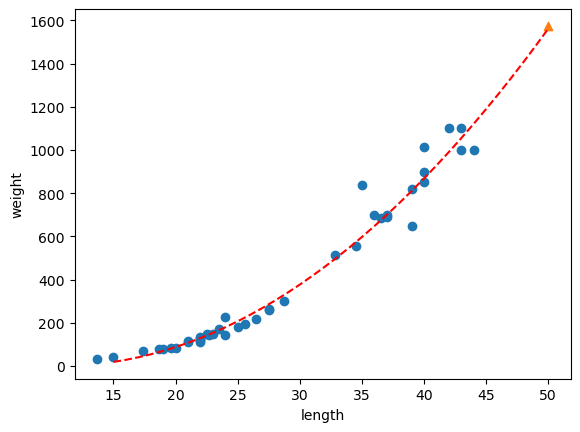

lr train score 0.9706807451768623
lr test score 0.9775935108325122


In [15]:
point = np.arange(15, 51)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05, color="red", linestyle="--")

plt.scatter([50], [1574], marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

print("lr train score", lr.score(train_poly, train_target))
print("lr test score", lr.score(test_poly, test_target))

In [27]:
point

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

## 다중 회귀

### 데이터 준비

In [16]:
import pandas as pd

df = pd.read_csv("./Data/perch_full.csv")
perch_full = df.to_numpy()

print(perch_full[:5])
print(perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


In [17]:
import numpy as np

perch_weight = np.array(
    [
        5.9,
        32.0,
        40.0,
        51.5,
        70.0,
        100.0,
        78.0,
        80.0,
        85.0,
        85.0,
        110.0,
        115.0,
        125.0,
        130.0,
        120.0,
        120.0,
        130.0,
        135.0,
        110.0,
        130.0,
        150.0,
        145.0,
        150.0,
        170.0,
        225.0,
        145.0,
        188.0,
        180.0,
        197.0,
        218.0,
        300.0,
        260.0,
        265.0,
        250.0,
        250.0,
        300.0,
        320.0,
        514.0,
        556.0,
        840.0,
        685.0,
        700.0,
        700.0,
        690.0,
        900.0,
        650.0,
        820.0,
        850.0,
        900.0,
        1015.0,
        820.0,
        1100.0,
        1000.0,
        1100.0,
        1000.0,
        1000.0,
    ]
)

In [18]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

### 사이킷런의 변환기 (Transformer)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# 간단 예제
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print("include bias = True", poly.transform([[2, 3]]))

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print("include bias = False", poly.transform([[2, 3]]))

include bias = True [[1. 2. 3. 4. 6. 9.]]
include bias = False [[2. 3. 4. 6. 9.]]


### 다항 특성 만들기

In [20]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly[0:3], train_poly.shape, sep="\n")

test_poly = poly.transform(test_input)

print(poly.get_feature_names_out())

[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


### 다항 회귀 모델 훈련

In [21]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print("lr train score: ", lr.score(train_poly, train_target))
print("lr test score: ", lr.score(test_poly, test_target))

lr train score:  0.9903183436982124
lr test score:  0.9714559911594106


In [22]:
# 고차항의 최대 차수 지정
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

# 선형 회귀 모델 훈련 및 훈련 세트 점수 계산
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
# 테스트 세트 점수 계산
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999997966
-144.40579369410085


## 규제
- 모델이 훈련 세트에 과대 적합 되는것을 방지

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

In [24]:
from sklearn.linear_model import Ridge

# 릿지
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("ridge train score: ", ridge.score(train_scaled, train_target))
print("ridge test score: ", ridge.score(test_scaled, test_target))

ridge train score:  0.9896101671037343
ridge test score:  0.9790693977615387


### 라쏘 회귀

In [25]:
from sklearn.linear_model import Lasso

# 라쏘
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print("lasso train score: ", lasso.score(train_scaled, train_target))
print("lasso test score: ", lasso.score(test_scaled, test_target))

lasso train score:  0.989789897208096
lasso test score:  0.9800593698421883


In [26]:
# 라쏘회귀 최적의 알파 적용
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print("lasso train score: ", lasso.score(train_scaled, train_target))
print("lasso test score: ", lasso.score(test_scaled, test_target))

lasso train score:  0.9888067471131867
lasso test score:  0.9824470598706695
